<a href="https://colab.research.google.com/github/Tapasyasunil/Guvi-tasks/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [3]:
# Converting the lists to NumPy arrays for ease
chirps_per_second = np.array(ground_cricket_data["Chirps/Second"])
ground_temperature = np.array(ground_cricket_data["Ground Temperature"])

In [4]:
# Task 1: Calculate the mean chirps per second
mean_chirps_per_second = np.mean(chirps_per_second)
print("Mean Chirps/Second:", mean_chirps_per_second)


Mean Chirps/Second: 16.566666666666666


In [5]:
# Task 2: Calculate the mean ground temperature
mean_ground_temperature = np.mean(ground_temperature)
print("Mean Ground Temperature:", mean_ground_temperature)

Mean Ground Temperature: 79.34666666666665


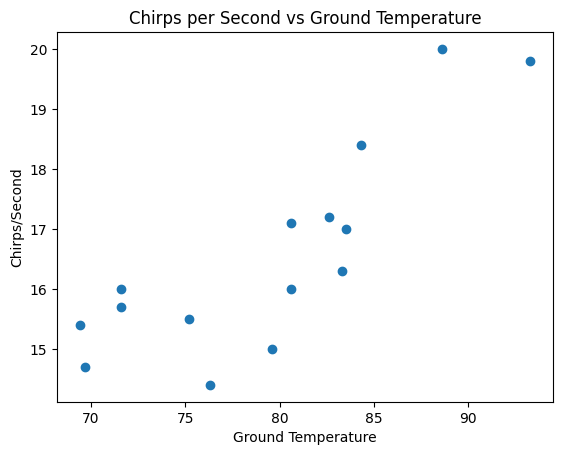

In [6]:
# Task 3: Create a scatter plot of chirps per second against ground temperature
plt.scatter(ground_temperature, chirps_per_second)
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.title("Chirps per Second vs Ground Temperature")
plt.show()

Task 4 &5
- Per the scatter plot we have created, When temperature is 95, chirps will be about 19
- If we record 18 chirps per second, temperature will approximately be about 85

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [9]:
data = pd.read_fwf("brain_body.txt")

In [11]:
data.head

<bound method NDFrame.head of       Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]>

In [12]:
# Extract the brain weight and body weight columns
brain_weight = data['Brain']
body_weight = data['Body']

In [15]:
# Task 1: Perform linear regression
regression_model = LinearRegression()
regression_model.fit(body_weight.values.reshape(-1, 1), brain_weight)
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
linear_equation = f"Brain = {slope:.2f} * Body + {intercept:.2f}"
print("Linear Regression Equation:", linear_equation)

Linear Regression Equation: Brain = 0.90 * Body + -56.86


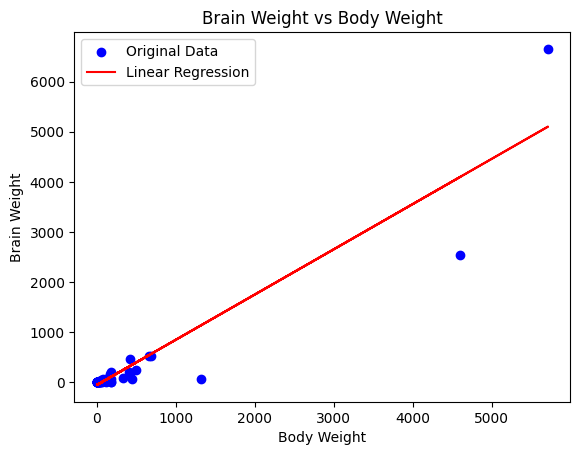

In [16]:
# Task 2: Plot the original data and the equation on the chart
plt.scatter(body_weight, brain_weight, color='b', label='Original Data')
plt.plot(body_weight, regression_model.predict(body_weight.values.reshape(-1, 1)), color='r', label='Linear Regression')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.title('Brain Weight vs Body Weight')
plt.legend()
plt.show()

In [18]:
# Task 3: Calculate the R2 score
r2_score_value = regression_model.score(body_weight.values.reshape(-1, 1), brain_weight)
print("R2 Score:", r2_score_value)

R2 Score: 0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [21]:
data = pd.read_fwf("salary.txt", header=None,
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [22]:
# Split the data into features (X) and target variable (y)
X = data.iloc[:, :5]  # Columns 1-5
y = data['Salary']

In [23]:
# Task 1: Perform linear regression
regression_model = LinearRegression()
regression_model.fit(X, y)
coefficients = regression_model.coef_
intercept = regression_model.intercept_
linear_equation = f"Salary = {coefficients[0]:.2f}*Sex + {coefficients[1]:.2f}*Rank + {coefficients[2]:.2f}*Year + {coefficients[3]:.2f}*Degree + {coefficients[4]:.2f}*YSdeg + {intercept:.2f}"
print("Linear Regression Equation:", linear_equation)

Linear Regression Equation: Salary = 1241.79*Sex + 5586.18*Rank + 482.86*Year + -1331.64*Degree + -128.79*YSdeg + 11410.15


In [27]:
# Task 2: Find the selection of columns with the best R2 score
best_r2_score = -np.inf
best_columns = None

from itertools import combinations

# Generate all possible combinations of columns
column_combinations = [combinations(X.columns, i) for i in range(1, 6)]
column_combinations = [item for sublist in column_combinations for item in sublist]

# Iterate over the column combinations and find the best R2 score
for columns in column_combinations:
    regression_model.fit(X[list(columns)], y)
    r2_score_value = regression_model.score(X[list(columns)], y)
    if r2_score_value > best_r2_score:
        best_r2_score = r2_score_value
        best_columns = columns

print("Columns with Best R2 Score:", best_columns)
print("Best R2 Score:", best_r2_score)


Columns with Best R2 Score: ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')
Best R2 Score: 0.8547180674410969


In [28]:
# Task 3: Report whether sex is a factor in salary
regression_model.fit(X[['Sex']], y)
r2_score_sex = regression_model.score(X[['Sex']], y)

if r2_score_sex > 0:
    print("Sex is a factor in salary.")
else:
    print("Sex is not a significant factor in salary.")

Sex is a factor in salary.
